In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
dataset = pd.read_csv("../data/heart.csv")

- **Age**: The age of the individual in years. (Numeric)

- **Sex**: The biological sex of the individual, typically coded as 0 for female and 1 for male. (Category)

- **ChestPainType**: The type of chest pain experienced by the individual, categorized into types such as: (Category)
  - Typical Angina
  - Atypical Angina
  - Non-Anginal Pain
  - Asymptomatic

- **RestingBP**: Resting blood pressure (measured in mmHg) taken while the person is at rest. (Numeric)

- **Cholesterol**: The cholesterol level in the blood, measured in mg/dL, including both LDL (bad cholesterol) and HDL (good cholesterol). (Numeric)

- **FastingBS**: Fasting blood sugar level, measured after fasting for 8+ hours, typically coded as 0 if <120 mg/dL and 1 if ≥120 mg/dL. (Category)

- **RestingECG**: Results of the resting electrocardiogram, which records the electrical activity of the heart. Categories often include:
  - Normal
  - Showing ST-T wave abnormalities (e.g., ischemia)
  - Indicating probable or definite left ventricular hypertrophy. (Category)

- **MaxHR**: Maximum heart rate achieved during physical activity, measured in beats per minute (bpm). (Numeric)

- **ExerciseAngina**: Presence of exercise-induced angina (chest pain due to reduced blood flow to the heart), typically coded as 0 for No and 1 for Yes. (Category)

- **Oldpeak**: The ST depression value on the ECG, representing changes in the heart's electrical activity during or after exercise. It indicates ischemia severity. (Numeric)

- **ST_Slope**: The slope of the ST segment during the ECG, categorized as: (Category)
  - Upsloping
  - Flat
  - Downsloping

- **HeartDisease**: Indicator of the presence of heart disease, typically coded as 0 for No (absence) and 1 for Yes (presence). (Target/Category)


In [42]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [43]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [44]:
print("Number of missing values in data", dataset.isnull().sum().sum()) # No Missing Values
print("Number of duplicates in data", dataset.duplicated().sum()) # No Duplicates

Number of missing values in data 0
Number of duplicates in data 0


In [45]:
print(dataset["ChestPainType"].value_counts())
print("---")
print(dataset["RestingBP"].describe()) # 0 does it make sense????
print("---")
print(dataset["Age"].describe())
print("---")
print(dataset['Cholesterol'].describe())  # Can Cholesterol be 0???? actually No
print("---")
print(dataset['FastingBS'].value_counts())
print("---")
print(dataset['MaxHR'].describe())
print("---")
print(dataset['ExerciseAngina'].value_counts())
print("---")
print(dataset['Oldpeak'].describe()) # Negative values should be refused
print("---")
print(dataset["HeartDisease"].value_counts())
print("---")

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
---
count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64
---
count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64
---
count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64
---
FastingBS
0    704
1    214
Name: count, dtype: int64
---
count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64
---
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
---
count    918.00

In [52]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [53]:
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
numerical_features = numerical_features.drop(labels=['HeartDisease', "FastingBS"])

In [60]:
numerical_features

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [61]:
def detect_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return outliers

for col in numerical_features:
    outliers = detect_outliers_IQR(dataset[col])
    print(f"Outliers in {col} are {outliers.sum()}")

Outliers in Age are 0
Outliers in RestingBP are 28
Outliers in Cholesterol are 183
Outliers in MaxHR are 2
Outliers in Oldpeak are 16


In [47]:
df = dataset.copy()

In [48]:
def kde_plot(df, feature):
    plt.figure(figsize=(10, 6))
    plt.title(f"{feature} Distribution")
    sns.kdeplot(df[feature], color="b", fill=True)
    plt.show()

def pie_plot(df, feature):
    plt.figure(figsize=(10, 6))
    plt.title(f"{feature} Distribution")
    df[feature].value_counts().plot.pie(autopct="%1.1f%%")
    plt.show()

def bar_plot(df, feature):
    plt.figure(figsize=(10, 6))
    plt.title(f"{feature} Distribution")
    df[feature].value_counts().plot.bar()
    plt.show()

def box_plot(df, feature):
    plt.figure(figsize=(10, 6))
    plt.title(f"{feature} Distribution")
    sns.boxplot(df[feature])
    plt.show()

def scatter_plot(df, feature1, feature2, hue):
    plt.figure(figsize=(10, 6))
    plt.title(f"{feature1} vs {feature2}")
    sns.scatterplot(x=feature1, y=feature2, data=df, hue=hue)
    plt.show()


In [49]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [50]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


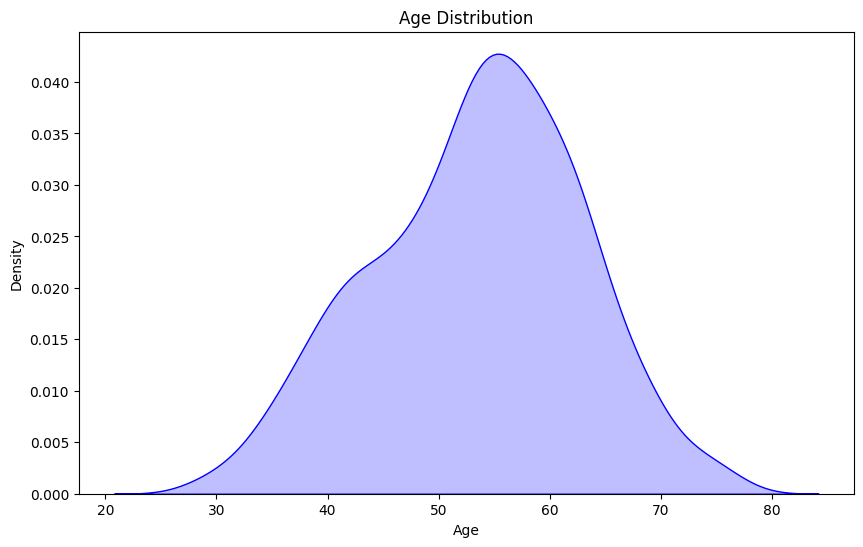

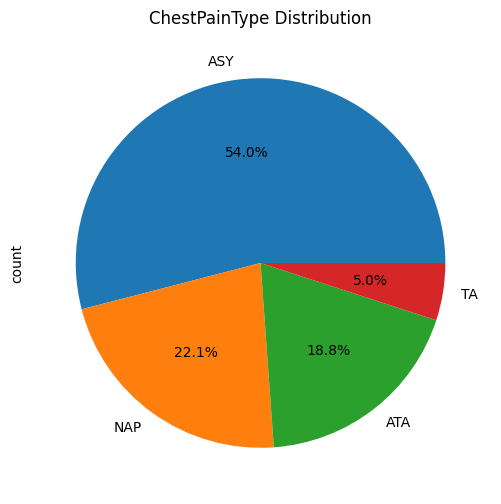

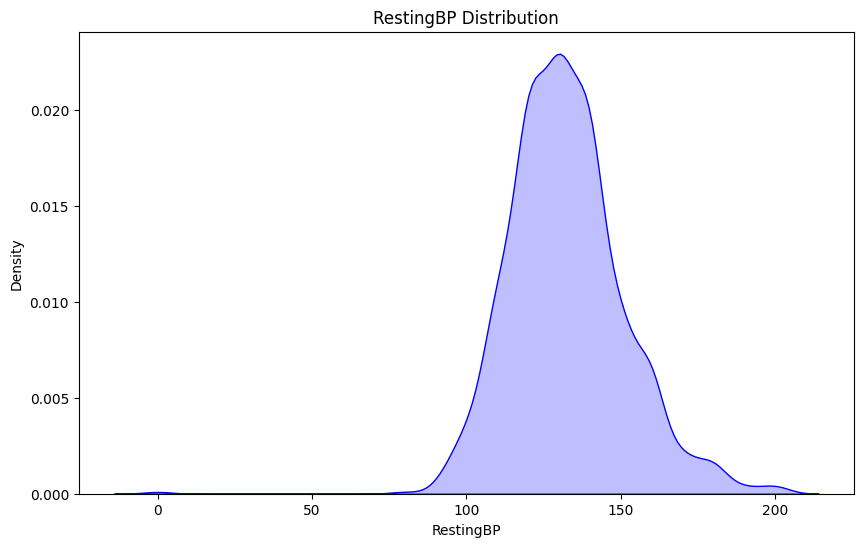

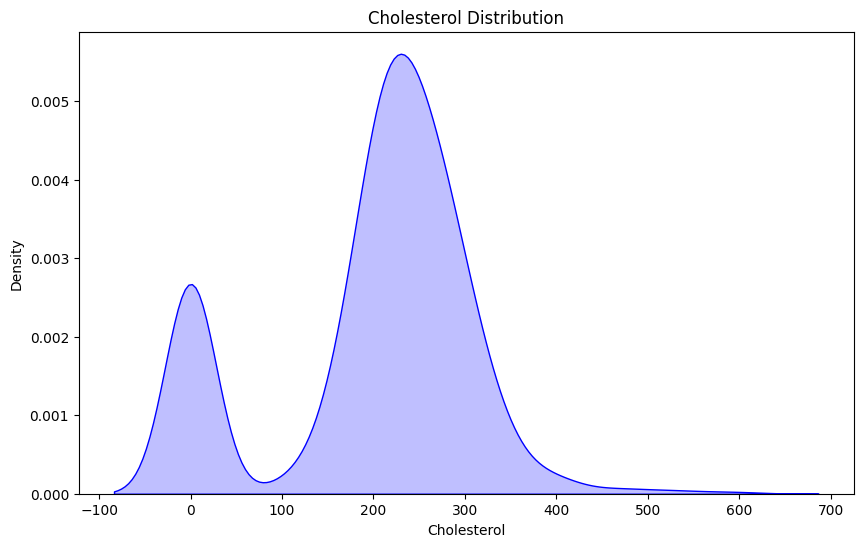

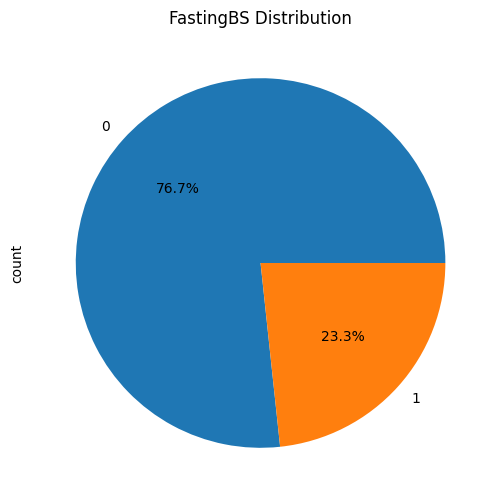

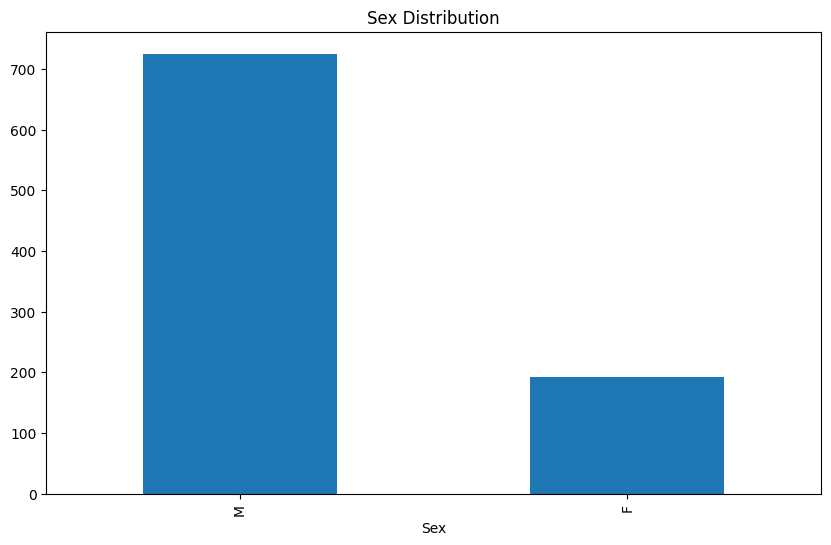

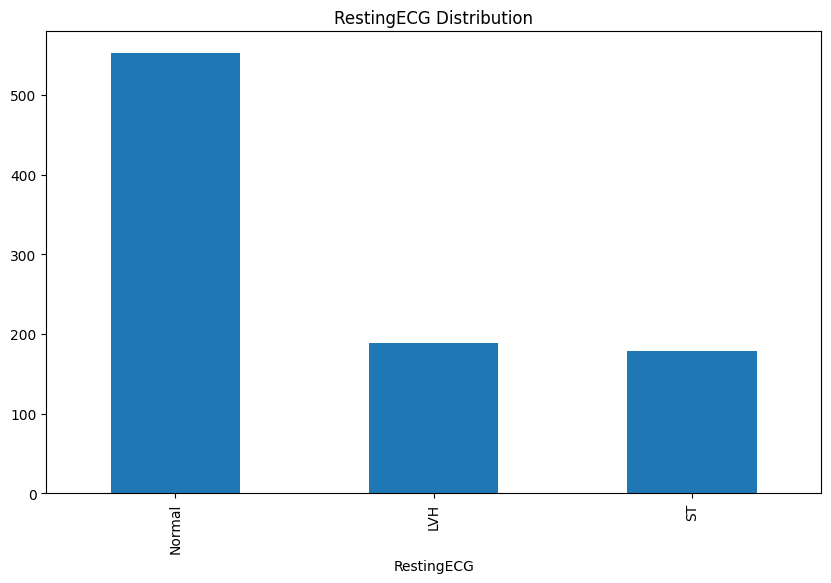

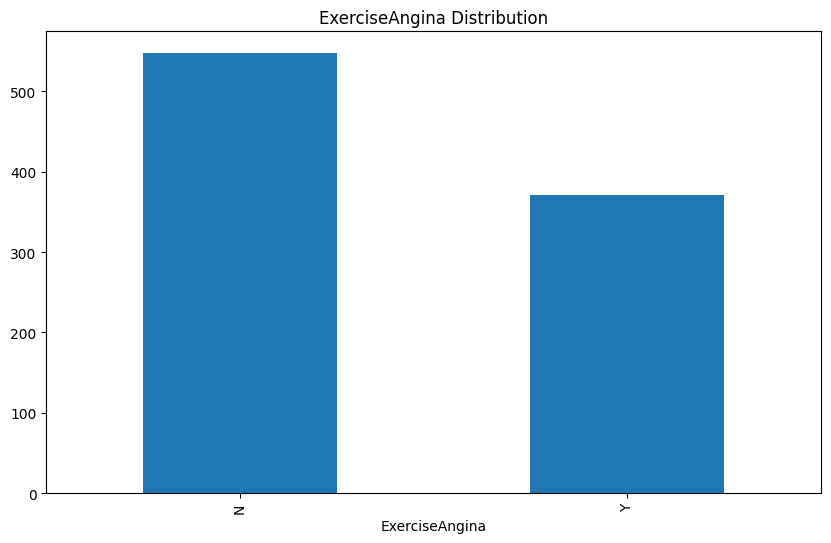

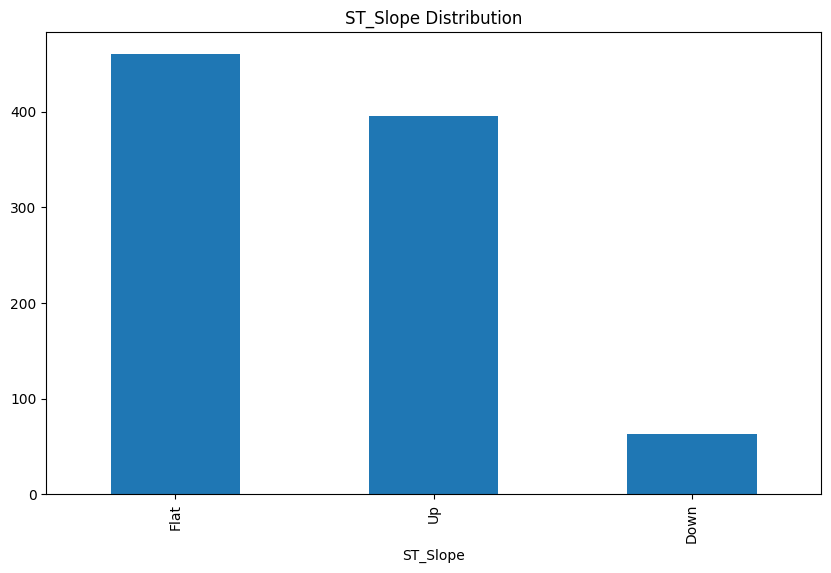

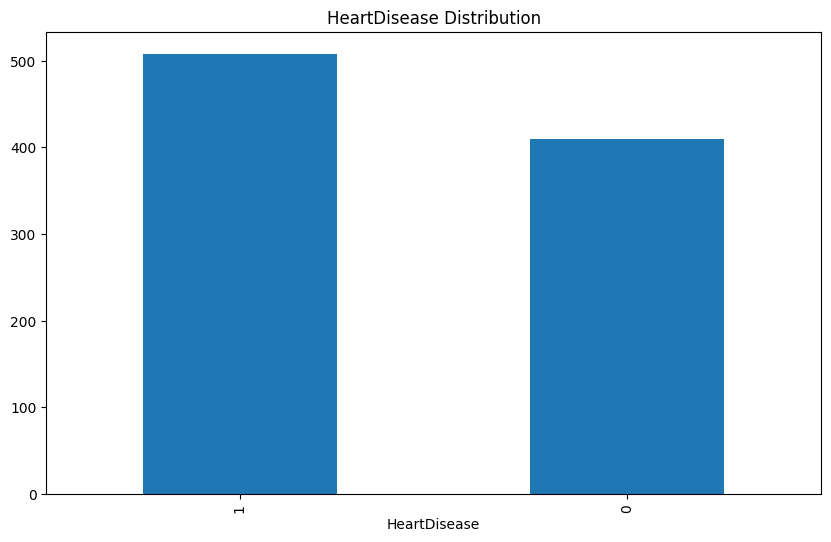

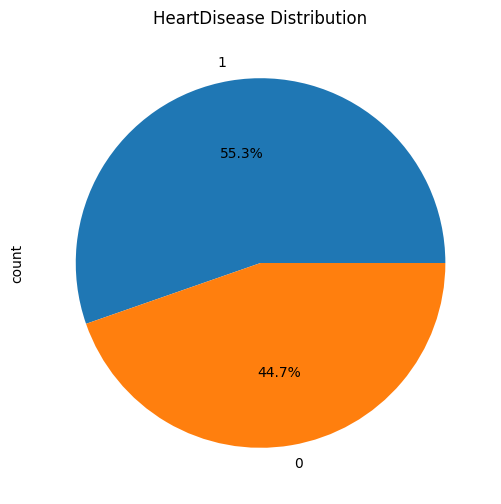

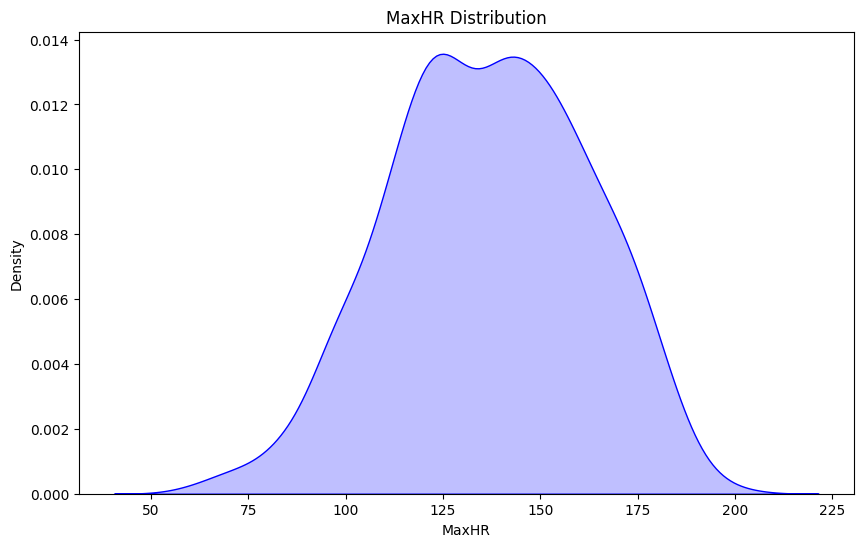

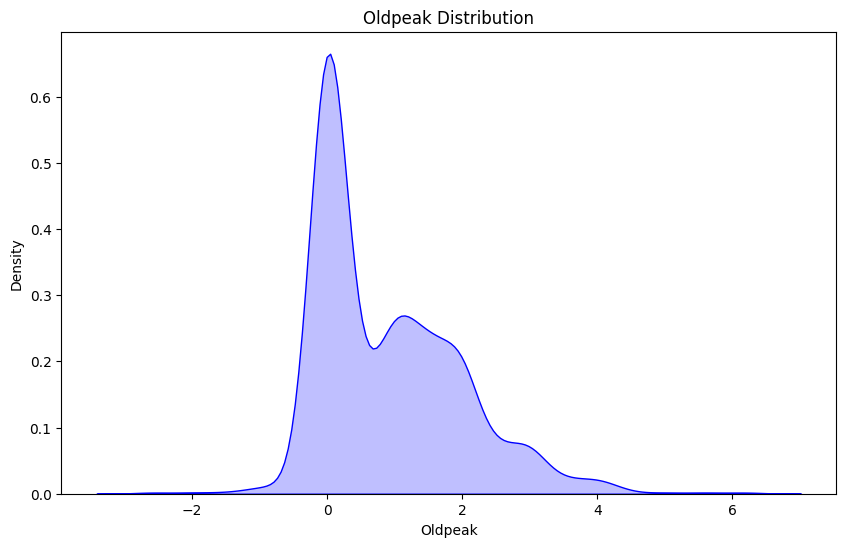

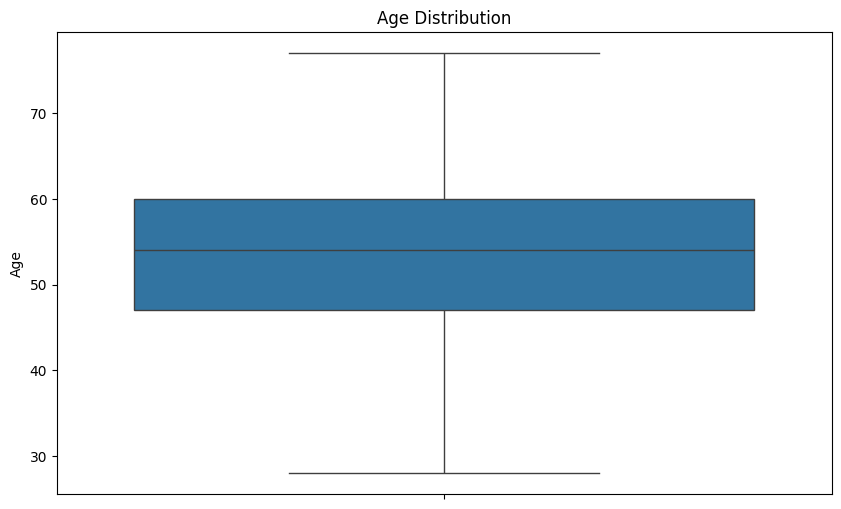

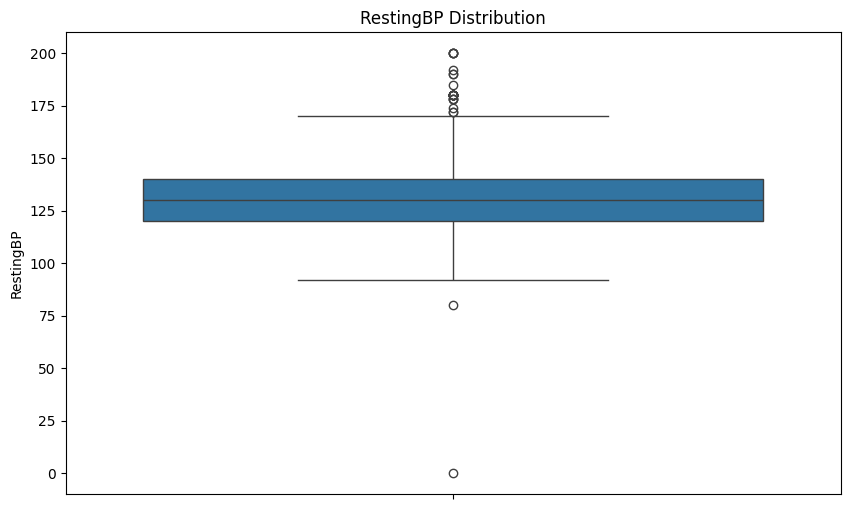

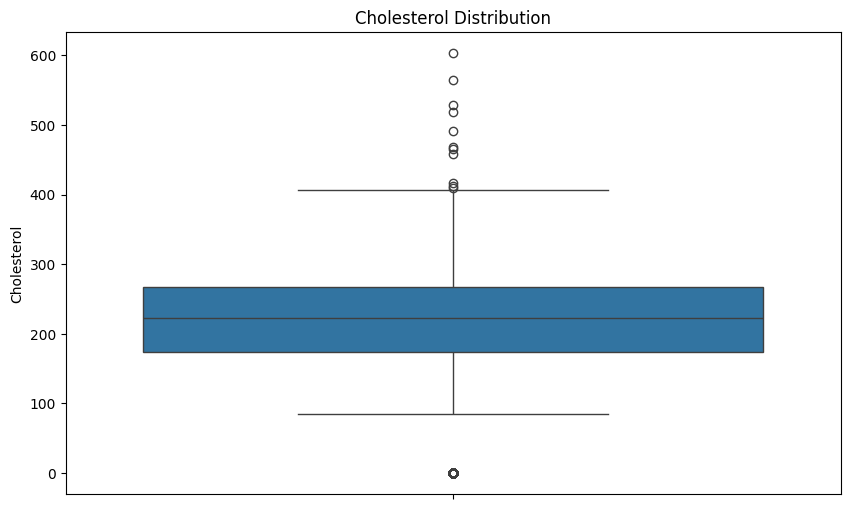

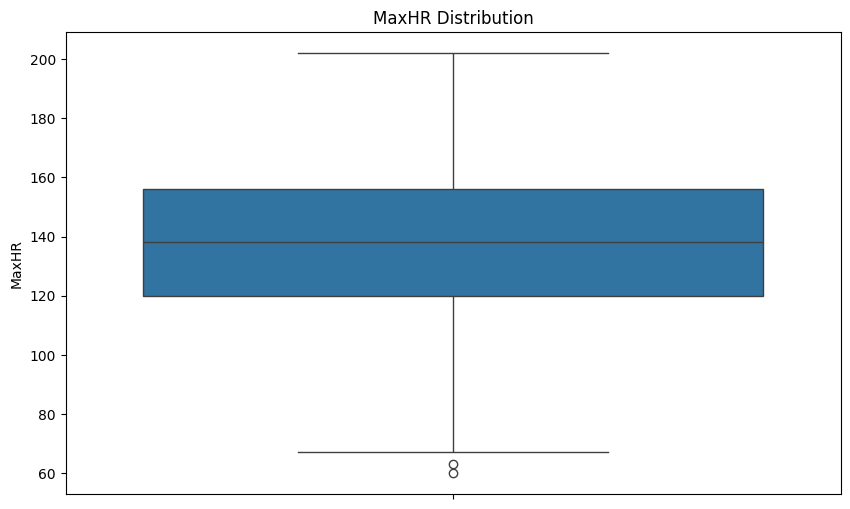

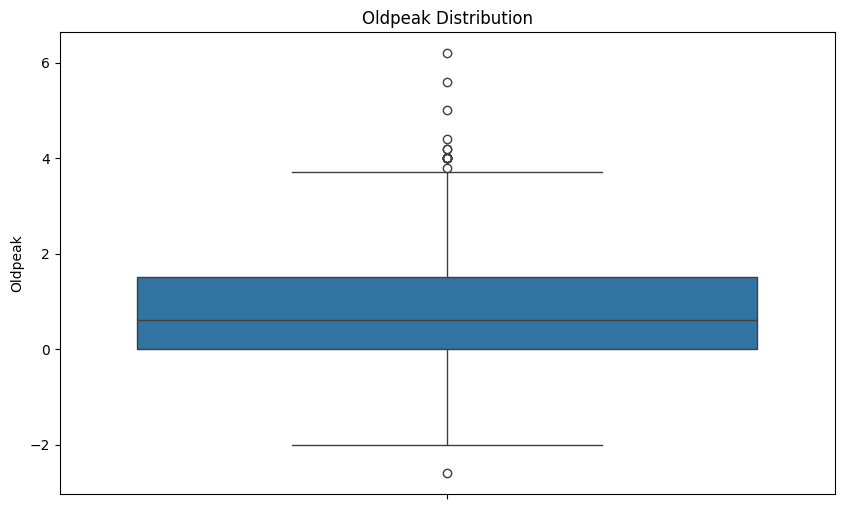

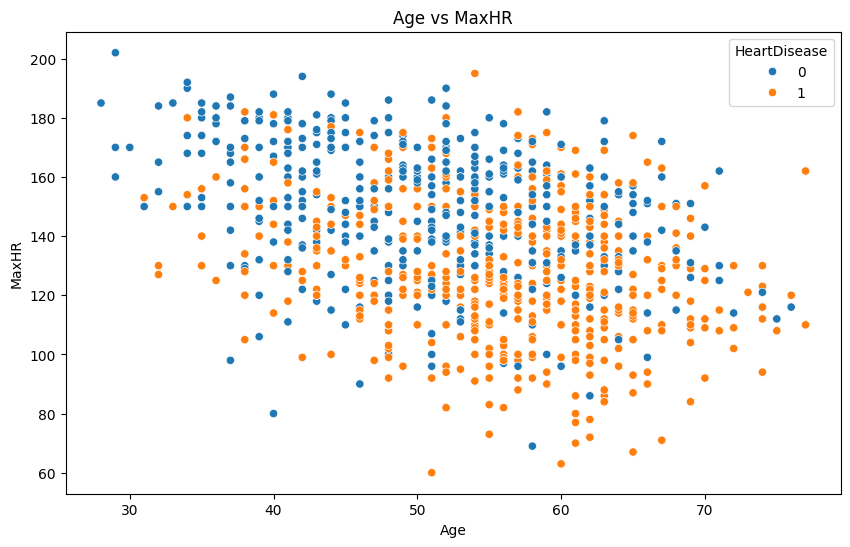

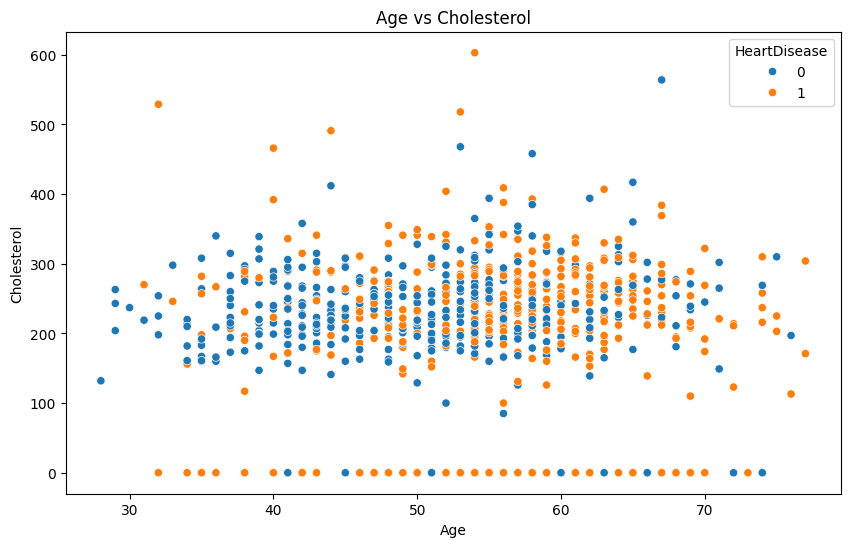

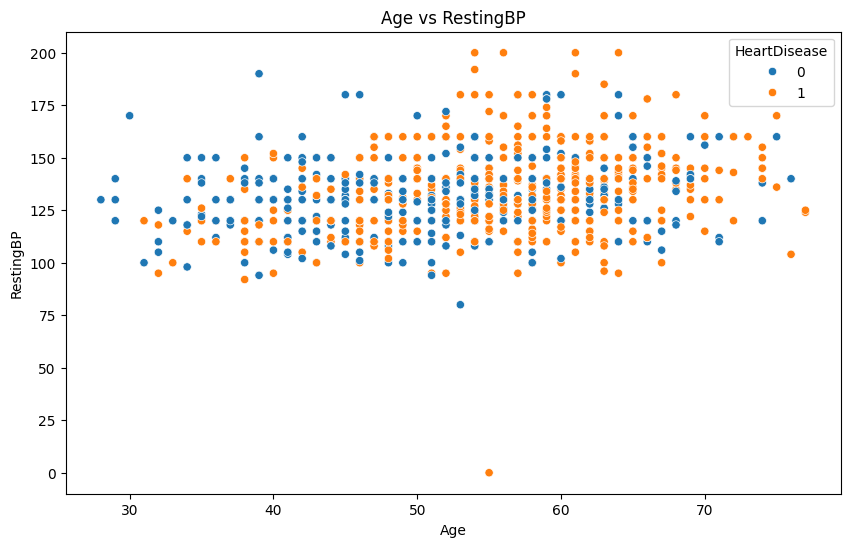

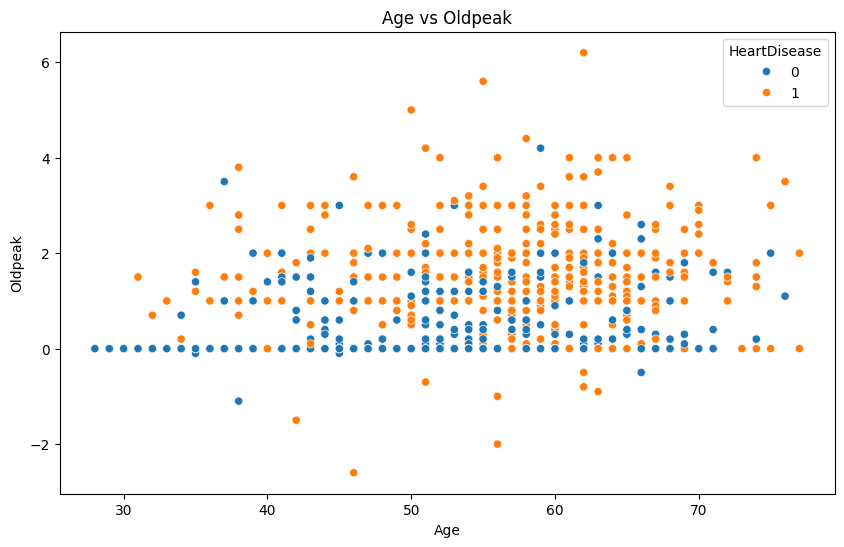

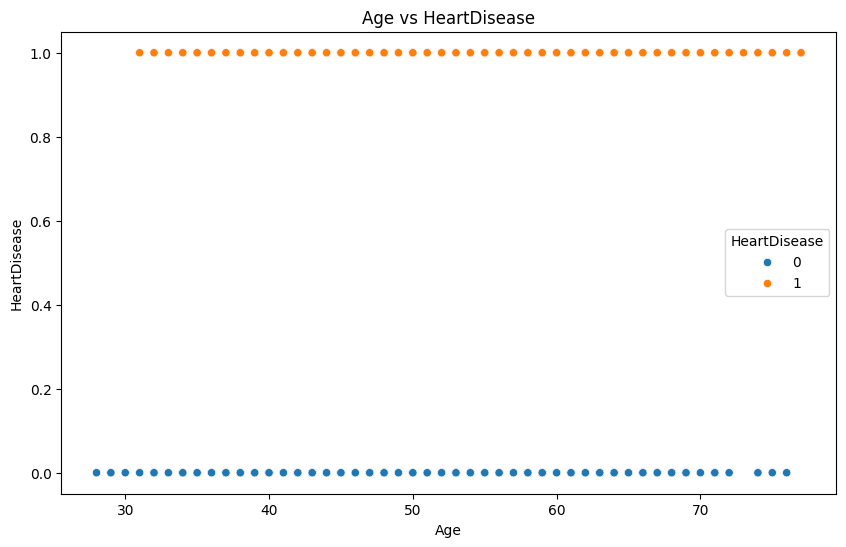

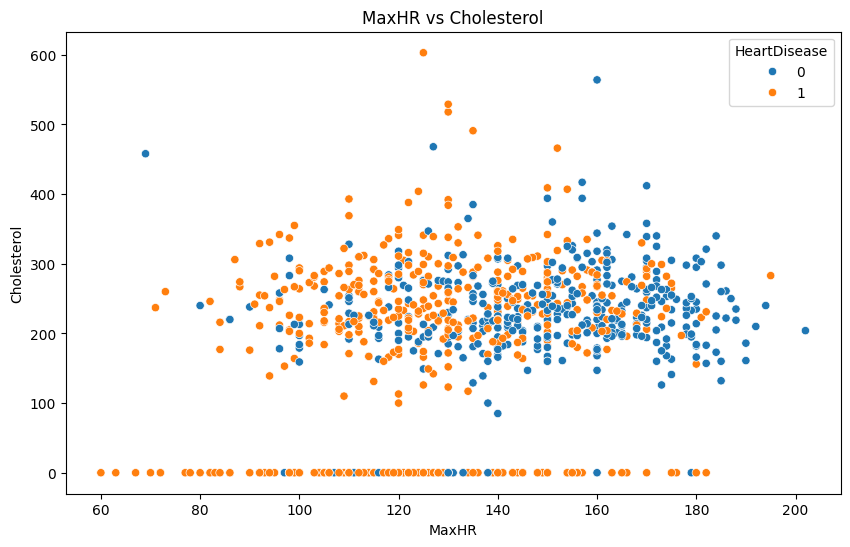

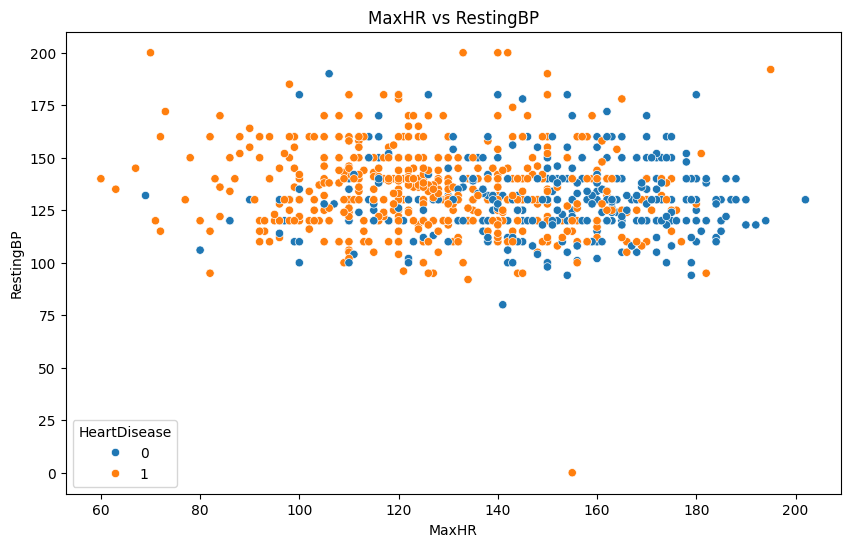

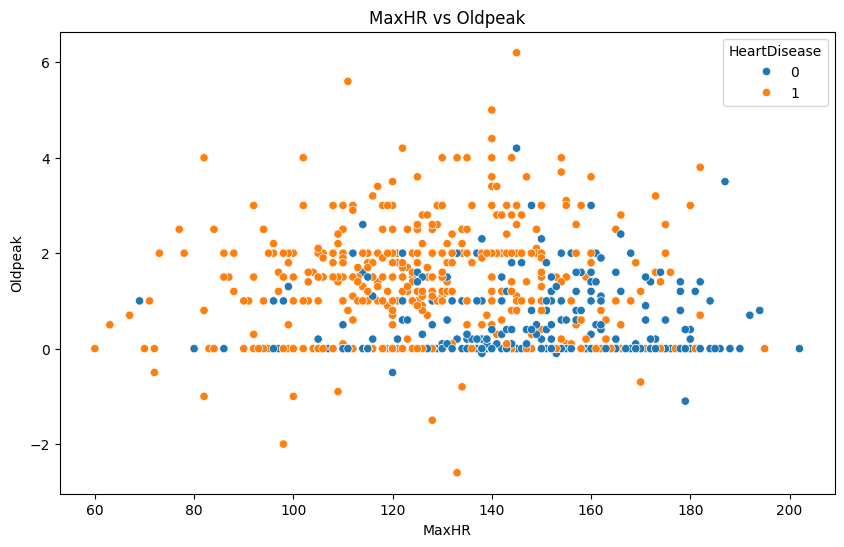

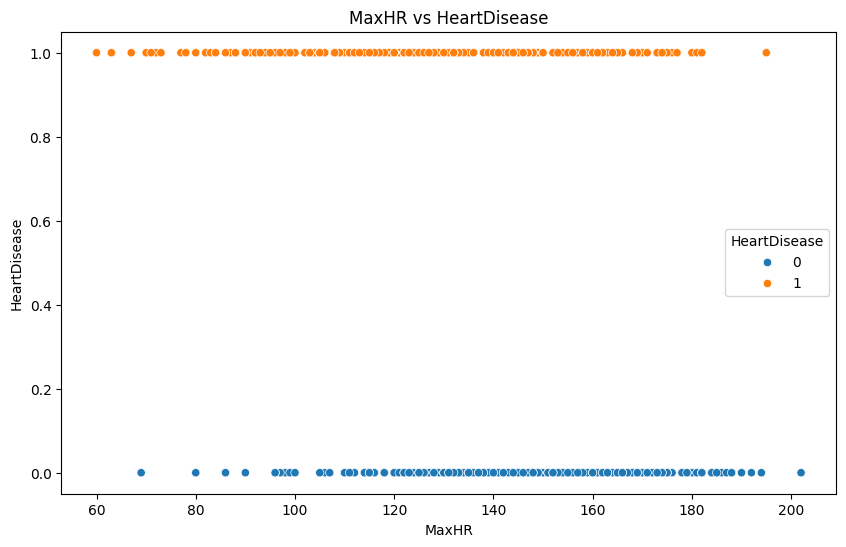

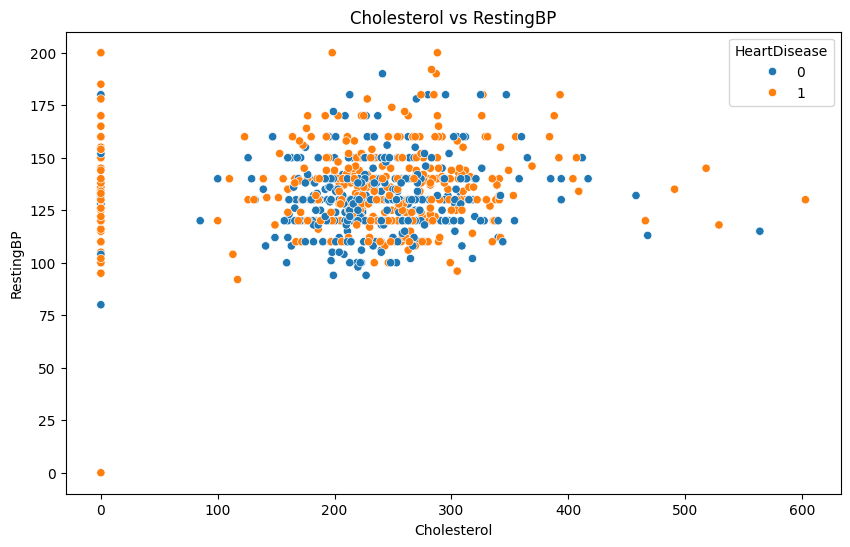

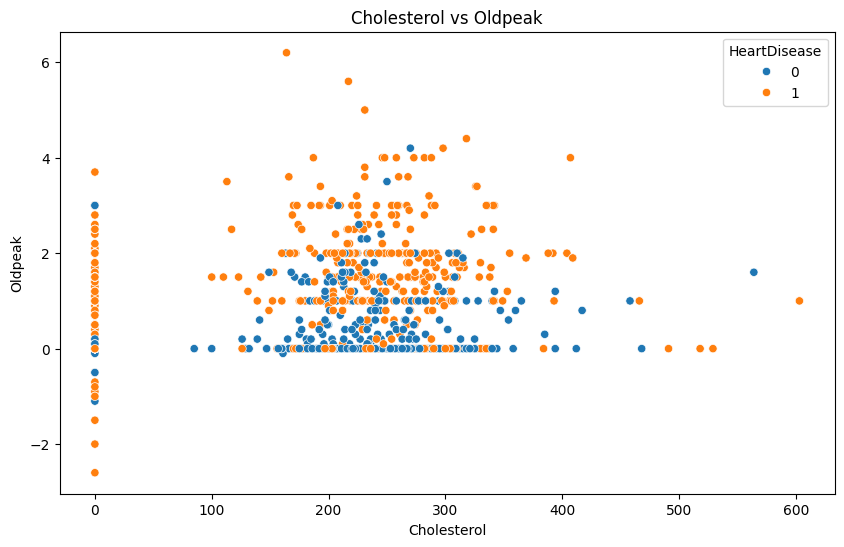

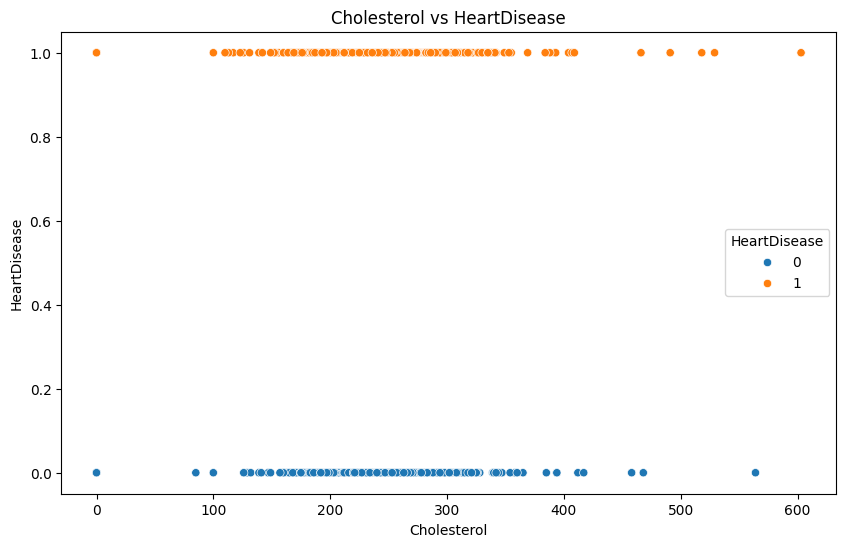

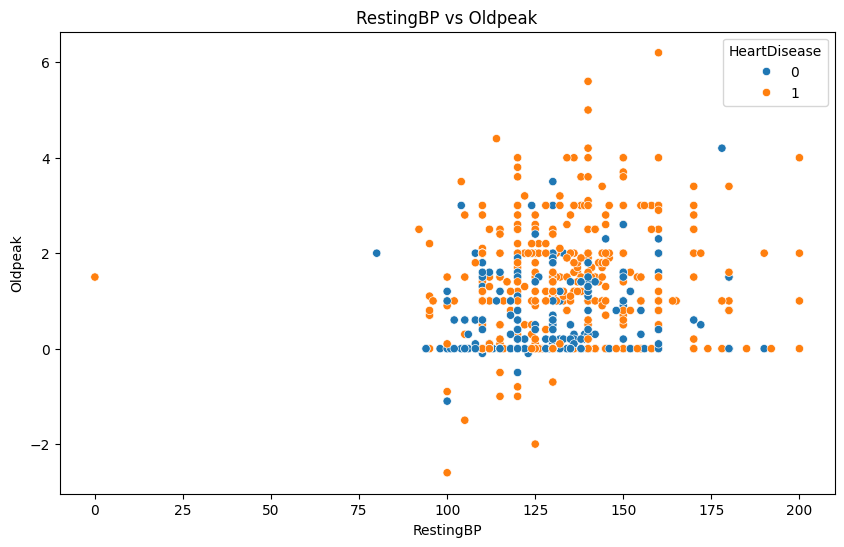

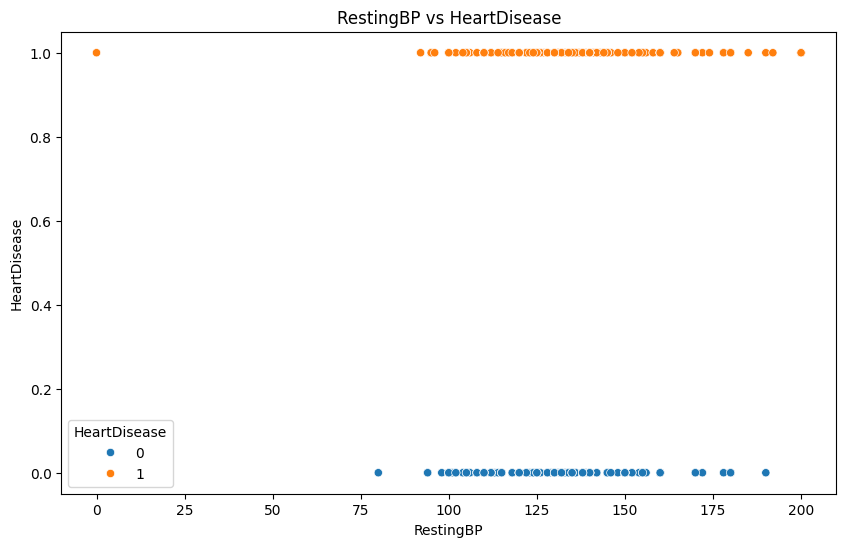

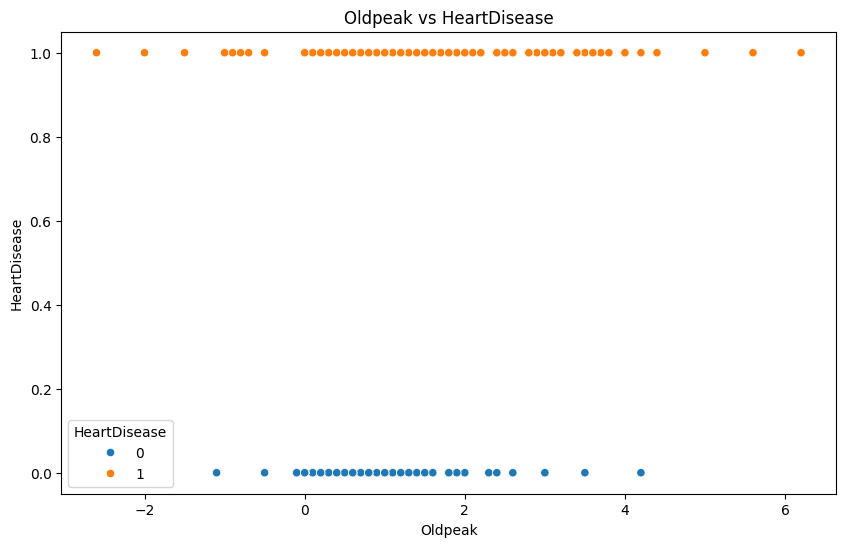

In [51]:
kde_plot(df, "Age")
kde_plot(df, "RestingBP")
kde_plot(df, "Cholesterol")
kde_plot(df, "MaxHR")
kde_plot(df, "Oldpeak")
pie_plot(df, "ChestPainType")
pie_plot(df, "HeartDisease")
pie_plot(df, "FastingBS")
bar_plot(df, "Sex")
bar_plot(df, "RestingECG")
bar_plot(df, "ExerciseAngina")
bar_plot(df, "ST_Slope")
bar_plot(df, "HeartDisease")
box_plot(df, "Age")
box_plot(df, "RestingBP")
box_plot(df, "Cholesterol")
box_plot(df, "MaxHR")
box_plot(df, "Oldpeak")
scatter_plot(df, "Age", "MaxHR", "HeartDisease")
scatter_plot(df, "Age", "Cholesterol", "HeartDisease")
scatter_plot(df, "Age", "RestingBP", "HeartDisease")
scatter_plot(df, "Age", "Oldpeak", "HeartDisease")
scatter_plot(df, "Age", "HeartDisease", "HeartDisease")
scatter_plot(df, "MaxHR", "Cholesterol", "HeartDisease")
scatter_plot(df, "MaxHR", "RestingBP", "HeartDisease")
scatter_plot(df, "MaxHR", "Oldpeak", "HeartDisease")
scatter_plot(df, "MaxHR", "HeartDisease", "HeartDisease")
scatter_plot(df, "Cholesterol", "RestingBP", "HeartDisease")
scatter_plot(df, "Cholesterol", "Oldpeak", "HeartDisease")
scatter_plot(df, "Cholesterol", "HeartDisease", "HeartDisease")
scatter_plot(df, "RestingBP", "Oldpeak", "HeartDisease")
scatter_plot(df, "RestingBP", "HeartDisease", "HeartDisease")
scatter_plot(df, "Oldpeak", "HeartDisease", "HeartDisease")